## BaseLine Of Fuji apple by predicting the next time step using the previous observation

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### ***Prepare Dataset of Fuji Apples***

In [2]:
df_fuji = pd.read_csv("../../../DataSet/Fuji/fuji.csv")
df_fuji

,Date,Fuji
0,04/01/2015,24964
1,11/01/2015,10998
2,18/01/2015,6342
3,25/01/2015,7556
4,01/02/2015,36532
...,...,...
164,25/02/2018,7519
165,04/03/2018,1836
166,11/03/2018,2280
167,18/03/2018,6655


In [3]:
df_fuji["Date"] = pd.to_datetime(df_fuji["Date"], format="%d/%m/%Y")
df_fuji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    169 non-null    datetime64[ns]
 1   Fuji    169 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


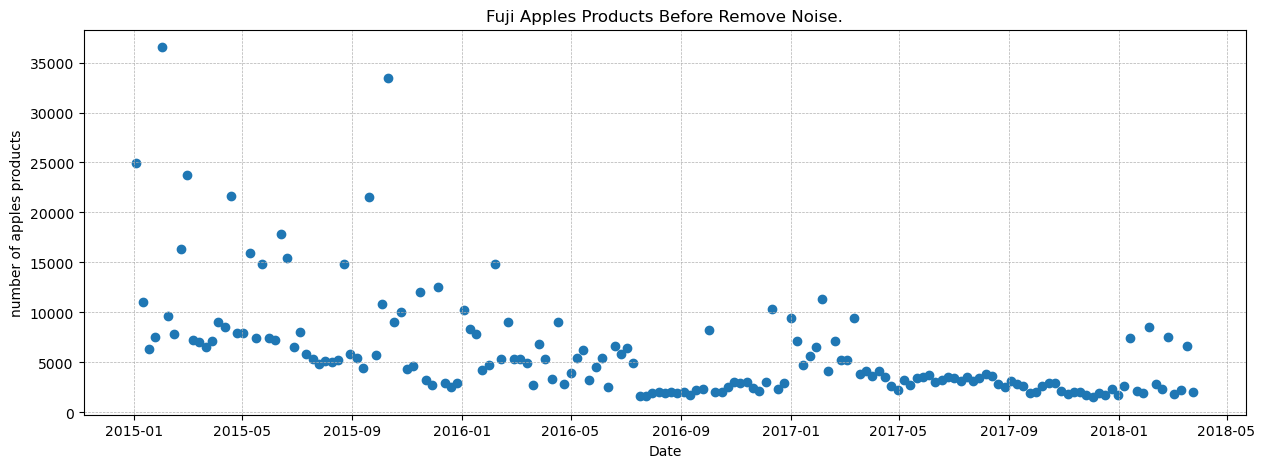

In [4]:
plt.figure(figsize=(15,5))
plt.scatter(df_fuji["Date"], df_fuji["Fuji"])
plt.title("Fuji Apples Products Before Remove Noise.")
plt.xlabel("Date")
plt.ylabel("number of apples products")
plt.grid(linestyle='--', linewidth='0.5')
plt.show()

In [5]:
df_fuji = df_fuji[df_fuji["Fuji"] <= 10000]

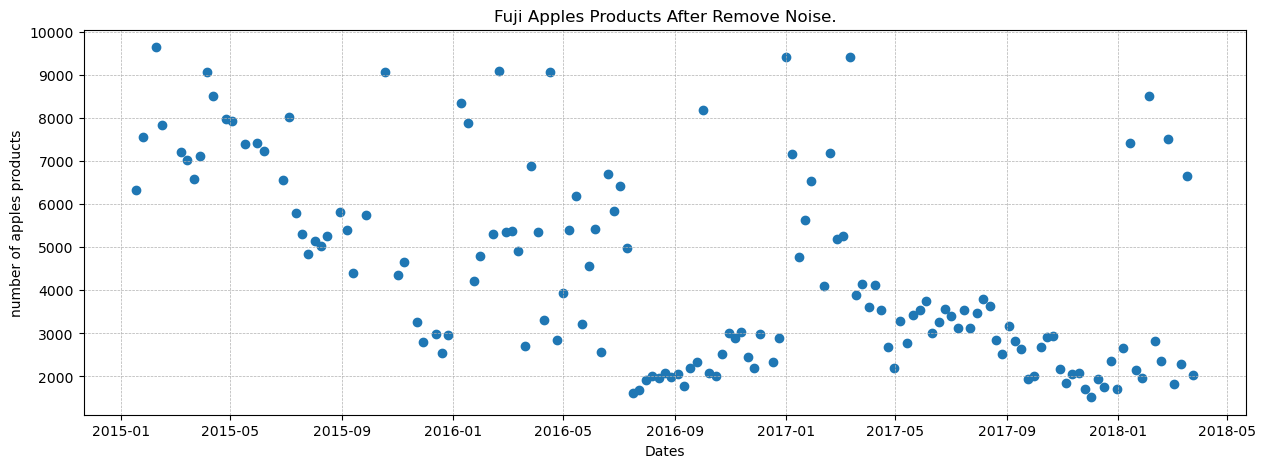

In [6]:
plt.figure(figsize=(15,5))
plt.scatter(df_fuji["Date"], df_fuji["Fuji"])
plt.title("Fuji Apples Products After Remove Noise.")
plt.xlabel("Dates")
plt.ylabel("number of apples products")
plt.grid(linestyle='--', linewidth='0.5')
plt.show()

predict the next time step using the previous observation

In [7]:
df_fuji = df_fuji.copy()
df_fuji["y"] = df_fuji["Fuji"].shift(-1)
df_fuji.dropna(inplace=True)
# df_fuji.info()

In [8]:
x = np.array(df_fuji.drop(columns='y'))
y = np.array(df_fuji.drop(columns='Fuji'))

# scaler = StandardScaler()
# scaler.fit(x.reshape(-1, 1))
# x = scaler.transform(x.reshape(-1, 1))
# scaler.fit(y.reshape(-1, 1))
# y = scaler.transform(y.reshape(-1, 1))


### ***Train Model Of Fuji Apples***

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=95626)

x_train = np.array(sorted(x_train, key=lambda x: x[0]))
x_test = np.array(sorted(x_test, key=lambda x: x[0]))
y_train = np.array(sorted(y_train, key=lambda x: x[0]))
y_test = np.array(sorted(y_test, key=lambda x: x[0]))

In [10]:
def writeEvaluate(model, mae:np.float64, mse:np.float64, r2:np.float64, mape:np.float64, filename):
    df = pd.read_csv(filename)
    row_index = df.index.get_loc(df.loc[df['Model'] == model].index[0])
    df.at[row_index,'Mae'] = mae
    df.at[row_index,'Mse'] = mse
    df.at[row_index,'R2'] = r2
    df.at[row_index,'Mape'] = mape

    df.to_csv(filename,encoding='utf-8', sep=',', index=False)

In [11]:
# def findBestBaseLine(r,t,x,y):
#     a = 1000000
#     index = 0
#     for i in range(r,t):
#         x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i)
#         if (buffer := mean_absolute_error(y_test[:,1:], x_test[:,1:])) < a:
#             a = buffer
#             index = i
#     print(a, index)
    

# findBestBaseLine(1,100000,x,y)

### ***Predict from test_dataset Of Fuji Apples***

In [12]:
baseline_predict = x_test[:, 1:]

Mean Absolute Error: 465.6756756756757
Mean Square Error: 342725.35135135136
R2 score: 0.8988003532425421
Mean Absolute Percentage Error: 0.12358261369598453


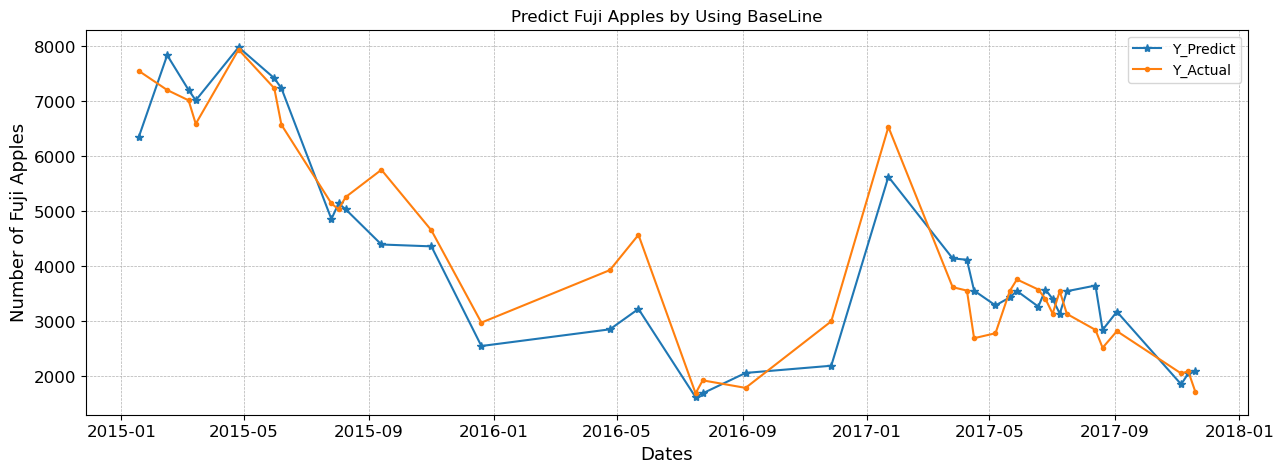

In [13]:
mae = mean_absolute_error(y_test[:, 1:], baseline_predict)
mse = mean_squared_error(y_test[:, 1:], baseline_predict)
r2 = r2_score(y_test[:, 1:], baseline_predict)
mape = mean_absolute_percentage_error(y_test[:, 1:], baseline_predict)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Square Error: {mse}")
print(f"R2 score: {r2}")
print(f"Mean Absolute Percentage Error: {mape}")

writeEvaluate("Baseline",mae,mse,r2,mape,"evaluate.csv")

plt.figure(figsize=(15, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(x_test[:, :1], baseline_predict, label="Y_Predict", marker='*')
plt.plot(x_test[:,:1], y_test[:, 1:], label="Y_Actual", marker='.')
plt.xlabel("Dates", fontsize=13)
plt.ylabel("Number of Fuji Apples", fontsize=13)
plt.title("Predict Fuji Apples by Using BaseLine")
plt.legend()
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

---